In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')


In [3]:

match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match.shape


(1095, 20)

In [5]:
delivery.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [7]:
total_score_df=delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [8]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [9]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [10]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [11]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [12]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [13]:
teams = [

'Sunrisers Hyderabad',

'Mumbai Indians',

'Royal Challengers Bangalore',

'Kolkata Knight Riders',

'Punjab Kings',

'Chennai Super Kings',

'Rajasthan Royals',

'Delhi Capitals',

'Lucknow Super Giants',

'Gujarat Titans'
]

In [14]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [15]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [16]:
match_df.shape

(965, 22)

In [17]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1426305,2024,Mumbai,2024-05-17,League,N Pooran,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Mumbai Indians,Mumbai Indians,...,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,1426305,214
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [18]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [19]:
delivery_df=match_df.merge(delivery,on='match_id')


In [20]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [21]:
delivery_df.shape

(111082, 20)

In [22]:

delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()




In [23]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [24]:
delivery_df['balls_left']=126 - (delivery_df['over']*6 + delivery_df['ball'])

In [25]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,125
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,124
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,123
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,122
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230277,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,3,67
230278,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,2,66
230279,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,1,65
230280,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,0,64


In [26]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x : x if x ==0  else 1)


In [27]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [28]:
delivery_df['wickets']=10- wickets

In [29]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,125,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,124,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,123,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,122,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,121,10


In [30]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
230277,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,0,NaN,NaN,110,3,67,8
230278,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,0,NaN,NaN,111,2,66,8
230279,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,0,NaN,NaN,112,1,65,8
230280,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,0,NaN,NaN,113,0,64,8
230281,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,1,NaN,0,0,NaN,NaN,114,-1,63,8


In [31]:
delivery_df['crr']=delivery_df.current_score*6/(120-delivery_df.balls_left)

In [32]:
delivery_df['rrr']=delivery_df.runs_left*6/delivery_df.balls_left

In [33]:
delivery_df = delivery_df.reset_index()

In [34]:
delivery_df.drop(columns='index',inplace=True)

In [35]:
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner
            

In [36]:
delivery_df['winner']=is_win(delivery_df)

In [37]:
final_df =delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]

In [38]:
final_df =final_df.sample(final_df.shape[0])

In [39]:
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

final_df['batting_team']=final_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

In [40]:
print(final_df.city.unique())
print(final_df.batting_team.unique())

['Hyderabad' 'Delhi' 'Bangalore' 'Kolkata' 'Ranchi' 'Mumbai' 'Centurion'
 'Sharjah' 'Ahmedabad' nan 'Jaipur' 'Pune' 'Cuttack' 'Durban' 'Cape Town'
 'Nagpur' 'Chandigarh' 'Chennai' 'Port Elizabeth' 'Bengaluru' 'Raipur'
 'Abu Dhabi' 'Guwahati' 'Dharamsala' 'Lucknow' 'Visakhapatnam' 'Dubai'
 'East London' 'Mohali' 'Navi Mumbai' 'Johannesburg' 'Indore'
 'Bloemfontein' 'Kimberley']
['Royal Challengers Bangalore' 'Delhi Capitals' 'Punjab Kings'
 'Kolkata Knight Riders' 'Chennai Super Kings' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Mumbai Indians' 'Lucknow Super Giants'
 'Gujarat Titans']


In [41]:
import random
cities_dict = {
    'Royal Challengers Bangalore':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Punjab Kings':'Dharamshala',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
    'Lucknow Super Giants': 'Lucknow',
    'Gujarat Titans':'Ahemdabad'
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city
        

final_df['city']=final_df.apply(fill_city,axis=1)

In [42]:
final_df.dropna(inplace=True)
final_df =final_df[final_df.balls_left !=0]

In [54]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns=['winner','match_id'])
y = final_df['winner']
X_copy =final_df.drop(columns=['winner'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

**SUPPORT VECTOR MACHINE**

In [55]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [56]:

ohe = OneHotEncoder()
ohe.fit(X[['batting_team', 'bowling_team', 'city']])
categories = ohe.categories_


cat_cols = ['batting_team', 'bowling_team', 'city']
num_cols = [col for col in X.columns if col not in cat_cols]

trf = ColumnTransformer([
    ('cat', OneHotEncoder(categories=categories, sparse_output=False, drop='first'), cat_cols),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_cols)
])

In [57]:
from sklearn.svm import LinearSVC
svm_pipe = Pipeline([
    ('preprocessor', trf),
    ('model', CalibratedClassifierCV(LinearSVC(random_state=42), cv=5))  
])


In [58]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object),
                                                                            array(['Chennai Super Kings', 'Delhi Capita...
       'Raipur', 'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)],
                                                                drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('model',
                 CalibratedClassifierCV(cv=5,
                                        estimator=LinearSVC(random_state=42)))])

In [60]:
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [61]:
y_pred = svm_pipe.predict_proba(X_test)
# accuracy_score(y_test,y_pred)
y_pred

array([[9.71525957e-01, 2.84740434e-02],
       [3.93256272e-01, 6.06743728e-01],
       [4.63725045e-01, 5.36274955e-01],
       ...,
       [6.79450714e-01, 3.20549286e-01],
       [9.99916509e-01, 8.34913391e-05],
       [8.71019467e-02, 9.12898053e-01]], shape=(22211, 2))

In [62]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

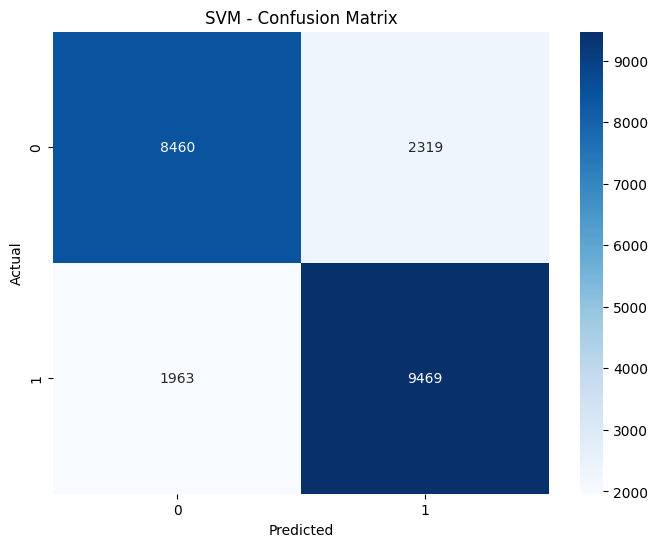

Accuracy: 80.72 %


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = svm_pipe.predict(X_test)


cm_svm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_pipe.classes_, yticklabels=svm_pipe.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", round(accuracy_svm, 2), "%")


In [65]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     10779
           1       0.80      0.83      0.82     11432

    accuracy                           0.81     22211
   macro avg       0.81      0.81      0.81     22211
weighted avg       0.81      0.81      0.81     22211



In [66]:
from sklearn.metrics import log_loss

# Get predicted probabilities
y_proba = svm_pipe.predict_proba(X_test)

# Compute log loss
loss = log_loss(y_test, y_proba)

print("Log Loss:", round(loss, 4))

Log Loss: 0.4062


In [ ]:
import pickle
pickle.dump(svm_pipe,open('svm_model.pkl','wb'))

**DECISION TREES**

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
cat_cols = ['batting_team', 'bowling_team', 'city']
num_cols = [col for col in X.columns if col not in cat_cols]

categories = [sorted(X[col].dropna().unique()) for col in cat_cols]

 # ColumnTransformer
trf = ColumnTransformer([
    ('cat', OneHotEncoder(categories=categories, sparse_output=False, drop='first'), cat_cols),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean'))
    ]), num_cols)
])

pipeline = Pipeline([
    ('preprocessor', trf),
    ('model', DecisionTreeClassifier())
])

In [69]:
# Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__max_depth': [5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__criterion': ['gini', 'entropy', 'log_loss']
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)

Best Hyperparameters: {'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_split': 2}
Best Accuracy (CV): 0.956215390649561


In [70]:
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9596146053757147


In [71]:
tree_pipe = Pipeline(steps=[
    ('preprocessor', trf),   
    ('model', DecisionTreeClassifier(max_depth=20,min_samples_split=2,random_state=42))
])



tree_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(categories=[['Chennai '
                                                                             'Super '
                                                                             'Kings',
                                                                             'Delhi '
                                                                             'Capitals',
                                                                             'Gujarat '
                                                                             'Titans',
                                                                             'Kolkata '
                                                                             'Knight '
                                                                             'Riders',
                                                                             'Lucknow '
                                                                             'Super '
                                                                             'Giants',
                                                                             'Mumbai '
                                                                             'Indians',
                                                                             'Punjab '
                                                                             'Kings',
                                                                             'Rajasthan '
                                                                             'Royals',
                                                                             'Royal '
                                                                             'Challengers '
                                                                             'Bangalore',
                                                                             'Sunrisers '
                                                                             'Hyderabad'],
                                                                            ['Chennai '
                                                                             'Super '
                                                                             'Kings',
                                                                             'Delhi...
                                                                             'Kolkata',
                                                                             'Lucknow',
                                                                             'Mohali',
                                                                             'Mumbai',
                                                                             'Nagpur',
                                                                             'Navi '
                                                                             'Mumbai',
                                                                             'Port '
                                                                             'Elizabeth',
                                                                             'Pune', ...]],
                                                                drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  

In [74]:
y_pred = tree_pipe.predict_proba(X_test)
# accuracy_score(y_test,y_pred)
y_pred

array([[0.      , 1.      ],
       [0.009375, 0.990625],
       [1.      , 0.      ],
       ...,
       [1.      , 0.      ],
       [1.      , 0.      ],
       [0.      , 1.      ]], shape=(22211, 2))

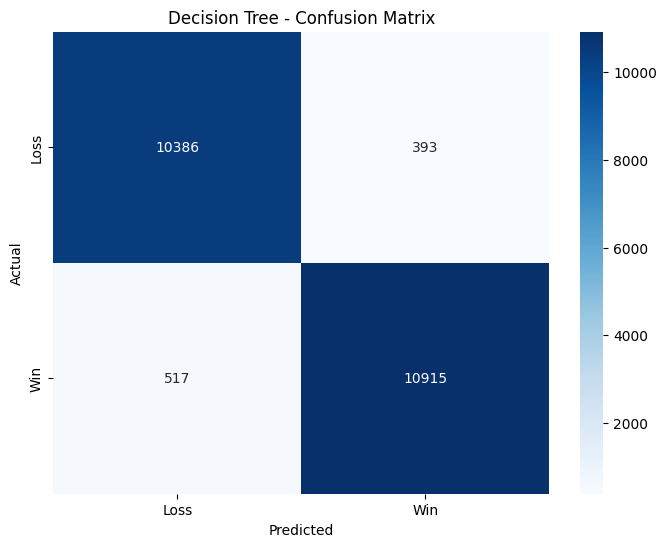

Accuracy: 95.9 %


In [75]:
y_pred_tree = tree_pipe.predict(X_test)


# Confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

# Accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree) * 100
print("Accuracy:", round(accuracy_tree, 2), "%")

In [76]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     10779
           1       0.97      0.95      0.96     11432

    accuracy                           0.96     22211
   macro avg       0.96      0.96      0.96     22211
weighted avg       0.96      0.96      0.96     22211



In [77]:
# Log Loss
y_proba_tree = tree_pipe.predict_proba(X_test)
logloss_tree = log_loss(y_test, y_proba_tree)
print("Decision Tree Log Loss / Cross-Entropy:", round(logloss_tree, 4))

Decision Tree Log Loss / Cross-Entropy: 0.3839


In [ ]:
import pickle
pickle.dump(tree_pipe,open('tree_model.pkl','wb'))

**RANDOM FOREST CLASSIFIER**

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

In [79]:
cat_cols = ['batting_team', 'bowling_team', 'city']
num_cols = [col for col in X.columns if col not in cat_cols]

categories = [sorted(X[col].dropna().unique()) for col in cat_cols]

 # ColumnTransformer
trf = ColumnTransformer([
    ('cat', OneHotEncoder(categories=categories, sparse_output=False, drop='first'), cat_cols),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean'))
    ]), num_cols)
])

pipeline = Pipeline([
    ('preprocessor', trf),
    ('model', RandomForestClassifier())
])

In [80]:
# Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__max_depth': [5, 10, 15, 20],
    'model__n_estimators': [100],
    'model__criterion': ['gini', 'log_loss','entropy'],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)  

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)

Best Hyperparameters: {'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best Accuracy (CV): 0.9811804735893617


In [81]:
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.987078474629688


In [82]:
forest_pipe = Pipeline([
    ('preprocessor', trf),
    ('model', RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=2, random_state=42))
])


In [83]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [84]:
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(categories=[['Chennai '
                                                                             'Super '
                                                                             'Kings',
                                                                             'Delhi '
                                                                             'Capitals',
                                                                             'Gujarat '
                                                                             'Titans',
                                                                             'Kolkata '
                                                                             'Knight '
                                                                             'Riders',
                                                                             'Lucknow '
                                                                             'Super '
                                                                             'Giants',
                                                                             'Mumbai '
                                                                             'Indians',
                                                                             'Punjab '
                                                                             'Kings',
                                                                             'Rajasthan '
                                                                             'Royals',
                                                                             'Royal '
                                                                             'Challengers '
                                                                             'Bangalore',
                                                                             'Sunrisers '
                                                                             'Hyderabad'],
                                                                            ['Chennai '
                                                                             'Super '
                                                                             'Kings',
                                                                             'Delhi...
                                                                             'Kolkata',
                                                                             'Lucknow',
                                                                             'Mohali',
                                                                             'Mumbai',
                                                                             'Nagpur',
                                                                             'Navi '
                                                                             'Mumbai',
                                                                             'Port '
                                                                             'Elizabeth',
                                                                             'Pune', ...]],
                                                                drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  

In [85]:
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [86]:
y_pred = forest_pipe.predict_proba(X_test)
# accuracy_score(y_test,y_pred)
y_pred

array([[6.29410309e-01, 3.70589691e-01],
       [1.95889277e-01, 8.04110723e-01],
       [8.87846671e-01, 1.12153329e-01],
       ...,
       [8.86220563e-01, 1.13779437e-01],
       [9.99852175e-01, 1.47825356e-04],
       [3.57008746e-02, 9.64299125e-01]], shape=(22211, 2))

In [87]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

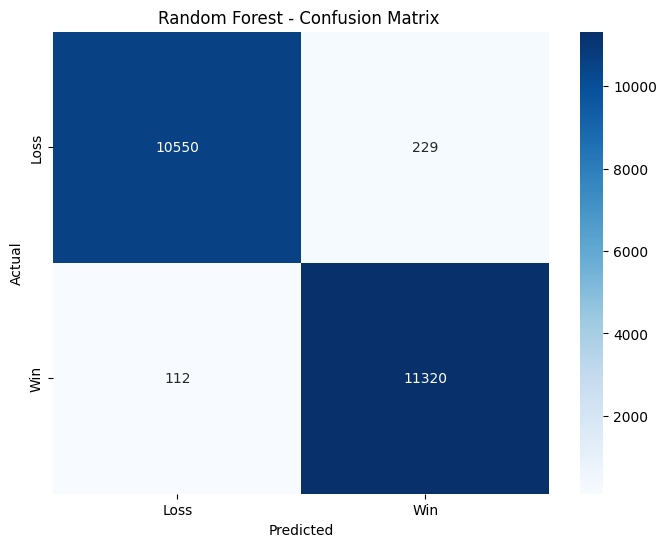

Accuracy: 98.46 %


In [88]:

# Predictions
y_pred = forest_pipe.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix ')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", round(accuracy, 2), "%")


In [89]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10779
           1       0.98      0.99      0.99     11432

    accuracy                           0.98     22211
   macro avg       0.98      0.98      0.98     22211
weighted avg       0.98      0.98      0.98     22211



In [90]:
from sklearn.metrics import log_loss

# Get predicted probabilities
y_proba = forest_pipe.predict_proba(X_test)

# Calculate Log Loss
loss = log_loss(y_test, y_proba)
print("Log Loss / Cross-Entropy Loss:", round(loss, 4))


Log Loss / Cross-Entropy Loss: 0.1534


In [ ]:
import pickle
pickle.dump(forest_pipe,open('tree.pkl','wb'))

In [181]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
42614,Sunrisers Hyderabad,Delhi Capitals,Delhi,129,114,9,143,14.000000,6.789474
84519,Rajasthan Royals,Delhi Capitals,Abu Dhabi,42,11,4,154,6.165138,22.909091
31970,Kolkata Knight Riders,Chennai Super Kings,Chennai,114,80,9,190,11.400000,8.550000
63937,Punjab Kings,Rajasthan Royals,Jaipur,124,87,7,158,6.181818,8.551724
46889,Rajasthan Royals,Mumbai Indians,Ahmedabad,148,106,10,164,6.857143,8.377358
...,...,...,...,...,...,...,...,...,...
41261,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,64,34,7,172,7.534884,11.294118
48086,Kolkata Knight Riders,Sunrisers Hyderabad,Visakhapatnam,137,97,9,176,10.173913,8.474227
11483,Chennai Super Kings,Mumbai Indians,Port Elizabeth,107,83,8,147,6.486486,7.734940
672,Rajasthan Royals,Punjab Kings,Jaipur,14,29,6,166,10.021978,2.896552


**XGBoost**

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier



In [92]:

ohe = OneHotEncoder()
ohe.fit(X[['batting_team', 'bowling_team', 'city']])
categories = ohe.categories_


cat_cols = ['batting_team', 'bowling_team', 'city']
num_cols = [col for col in X.columns if col not in cat_cols]

trf = ColumnTransformer([
    ('cat', OneHotEncoder(categories=categories, sparse_output=False, drop='first'), cat_cols),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
    ]), num_cols)
])


In [93]:
xgb_pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_pipe.fit(X_train, y_train)


c:\anaconda\envs\IPL-Win-Predictor\lib\site-packages\xgboost\training.py:183: UserWarning: [19:15:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object),
                                                                            array(['Chennai Super Kings', 'Delhi Capita...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [94]:
y_pred = xgb_pipe.predict_proba(X_test)
# accuracy_score(y_test,y_pred)
y_pred

array([[7.9834998e-01, 2.0165002e-01],
       [4.9484730e-02, 9.5051527e-01],
       [9.7342134e-01, 2.6578682e-02],
       ...,
       [9.8245144e-01, 1.7548556e-02],
       [9.9969190e-01, 3.0811620e-04],
       [3.1372309e-03, 9.9686277e-01]], shape=(22211, 2), dtype=float32)

Accuracy: 98.61%


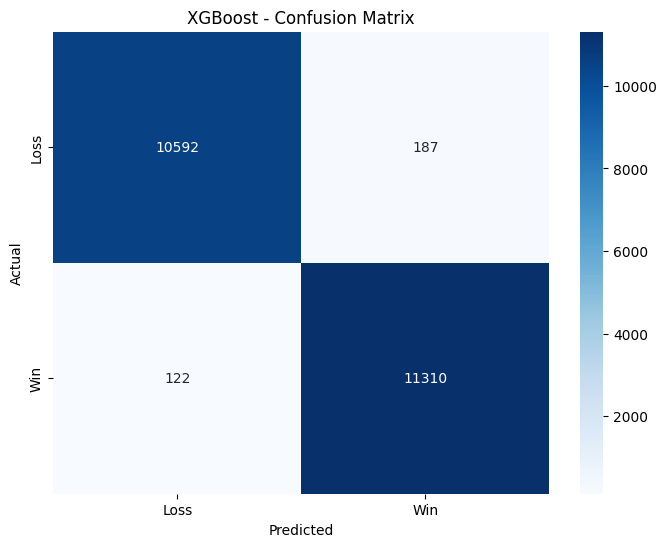

In [96]:
y_pred = xgb_pipe.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()


In [98]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10779
           1       0.98      0.99      0.99     11432

    accuracy                           0.99     22211
   macro avg       0.99      0.99      0.99     22211
weighted avg       0.99      0.99      0.99     22211



In [99]:
from sklearn.metrics import log_loss

# Get class probabilities
y_proba_xgb = xgb_pipe.predict_proba(X_test)

# Calculate Log Loss
loss_xgb = log_loss(y_test, y_proba_xgb)
print("XGBoost Log Loss / Cross-Entropy Loss:", round(loss_xgb, 4))


XGBoost Log Loss / Cross-Entropy Loss: 0.0822


In [ ]:
import pickle
pickle.dump(xgb_pipe,open('xgb_model.pkl','wb'))

In [191]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
101553,Gujarat Titans,Rajasthan Royals,Jaipur,59,79,10,118,8.634146,4.481013
87230,Kolkata Knight Riders,Chennai Super Kings,Dubai,89,51,7,192,8.956522,10.470588
6940,Royal Challengers Bangalore,Sunrisers Hyderabad,Cape Town,162,99,8,184,6.285714,9.818182
22425,Rajasthan Royals,Mumbai Indians,Jaipur,37,53,8,94,5.104478,4.188679
71986,Punjab Kings,Sunrisers Hyderabad,Hyderabad,105,49,6,212,9.042254,12.857143
...,...,...,...,...,...,...,...,...,...
82328,Punjab Kings,Mumbai Indians,Chennai,40,44,9,131,7.184211,5.454545
18373,Royal Challengers Bangalore,Sunrisers Hyderabad,Nagpur,59,49,8,151,7.774648,7.224490
16996,Royal Challengers Bangalore,Delhi Capitals,Delhi,178,122,10,184,-18.000000,8.754098
96303,Delhi Capitals,Lucknow Super Giants,Lucknow,73,22,3,193,7.346939,19.909091


c:\anaconda\envs\IPL-Win-Predictor\lib\site-packages\xgboost\training.py:183: UserWarning: [19:18:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


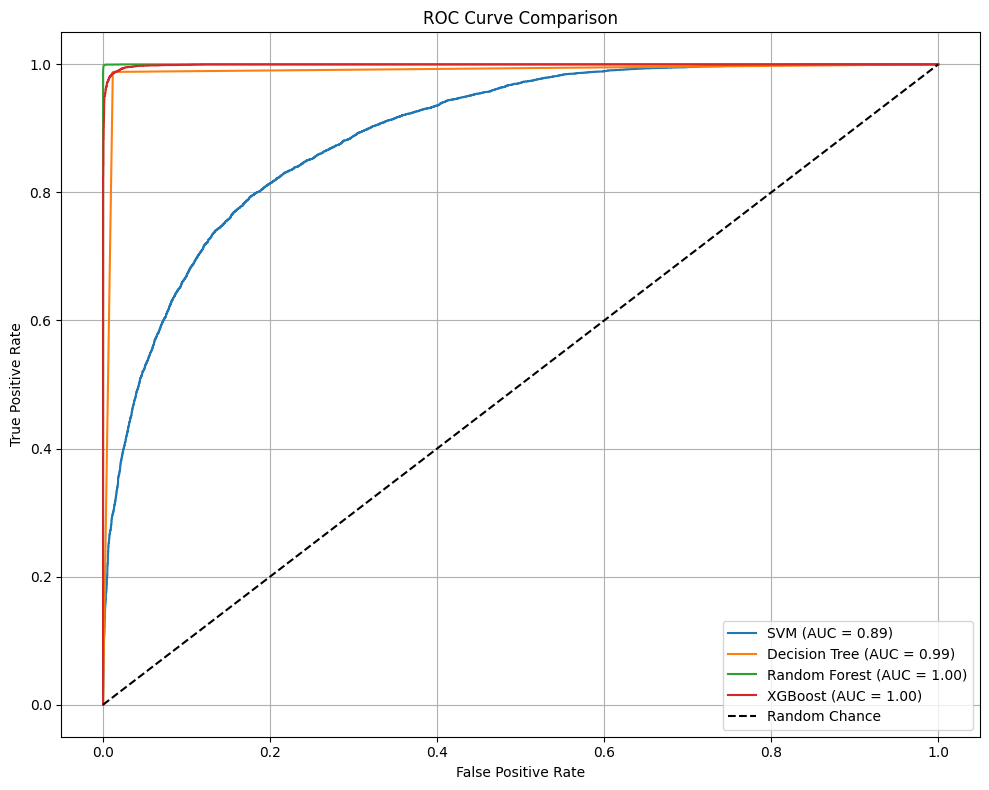

In [100]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


y_bin = label_binarize(y_test, classes=[0, 1])

# Initialize models
models = {
    "SVM": CalibratedClassifierCV(LinearSVC(random_state=42), cv=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    clf = Pipeline([
        ('preprocessor', trf),    
        ('model', model)
    ])
    
    clf.fit(X_train, y_train)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


**Match Progression Using Random Forest Classifier**

In [101]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]

    print(f"Rows before dropna: {match.shape[0]}")

    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]

    # Clean remaining inf/nan values
    temp_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    temp_df.dropna(inplace=True)

    print(f"Rows after cleaning: {temp_df.shape[0]}")

    if temp_df.empty:
        raise ValueError("No valid rows found for prediction. Check if match has overs with ball==6 and no missing values.")

    # Prediction
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Run progression
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    # Wickets progression
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    return temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']], target


In [ ]:
print(delivery_df['match_id'].unique())


In [ ]:

temp_df ,target =match_progression(delivery_df, 1426271,forest_pipe)

In [103]:
import plotly.graph_objects as go

# Create traces for lines with markers
trace_wickets = go.Scatter(
    x=temp_df['end_of_over'],
    y=temp_df['wickets_in_over'],
    mode='markers+lines',
    marker=dict(color='pink', size=8, symbol='circle'),
    name='Wickets Lost'
)

trace_win = go.Scatter(
    x=temp_df['end_of_over'],
    y=temp_df['win'],
    mode='lines',
    line=dict(color='#00a65a', width=4),
    name='Win Probability'
)

trace_lose = go.Scatter(
    x=temp_df['end_of_over'],
    y=temp_df['lose'],
    mode='lines',
    line=dict(color='red', width=4),
    name='Lose Probability'
)

# Create trace for bar chart
trace_runs = go.Bar(
    x=temp_df['end_of_over'],
    y=temp_df['runs_after_over'],
    name='Runs Scored'
)

# Create annotations for wickets lost
annotations = [dict(
    x=row['end_of_over'],
    y=row['wickets_in_over'],
    text=str(int(row['wickets_in_over'])),
    showarrow=False,
    font=dict(color='black', size=14)
) for index, row in temp_df.iterrows()]

# Create layout
layout = go.Layout(
    title='Match Progression (Target: ' + str(target) + ')',
    xaxis=dict(title='Overs', tickfont=dict(size=15)),
    yaxis=dict(title='Count'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=[trace_wickets, trace_win, trace_lose, trace_runs], layout=layout)

# Add annotations
fig.update_layout(annotations=annotations)

# Show plot
fig.show()


**Match Progression Using XGBoost**

In [104]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]

    print(f"Rows before dropna: {match.shape[0]}")

    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]

    # Clean remaining inf/nan values
    temp_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    temp_df.dropna(inplace=True)

    print(f"Rows after cleaning: {temp_df.shape[0]}")

    if temp_df.empty:
        raise ValueError("No valid rows found for prediction. Check if match has overs with ball==6 and no missing values.")

    # Prediction
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Run progression
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    # Wickets progression
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    return temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']], target


In [ ]:
temp_df ,target =match_progression(delivery_df, 1426271,xgb_pipe)

In [106]:
import plotly.graph_objects as go

# Create traces for lines with markers
trace_wickets = go.Scatter(
    x=temp_df['end_of_over'],
    y=temp_df['wickets_in_over'],
    mode='markers+lines',
    marker=dict(color='pink', size=8, symbol='circle'),
    name='Wickets Lost'
)

trace_win = go.Scatter(
    x=temp_df['end_of_over'],
    y=temp_df['win'],
    mode='lines',
    line=dict(color='#00a65a', width=4),
    name='Win Probability'
)

trace_lose = go.Scatter(
    x=temp_df['end_of_over'],
    y=temp_df['lose'],
    mode='lines',
    line=dict(color='red', width=4),
    name='Lose Probability'
)

# Create trace for bar chart
trace_runs = go.Bar(
    x=temp_df['end_of_over'],
    y=temp_df['runs_after_over'],
    name='Runs Scored'
)

# Create annotations for wickets lost
annotations = [dict(
    x=row['end_of_over'],
    y=row['wickets_in_over'],
    text=str(int(row['wickets_in_over'])),
    showarrow=False,
    font=dict(color='black', size=14)
) for index, row in temp_df.iterrows()]

# Create layout
layout = go.Layout(
    title='Match Progression (Target: ' + str(target) + ')',
    xaxis=dict(title='Overs', tickfont=dict(size=15)),
    yaxis=dict(title='Count'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=[trace_wickets, trace_win, trace_lose, trace_runs], layout=layout)

# Add annotations
fig.update_layout(annotations=annotations)

# Show plot
fig.show()


In [68]:
import pandas as pd
import plotly.graph_objs as go


# Calculate the total matches won by each team
total_matches_won = match['winner'].value_counts()

# Calculate the total matches won by each team after choosing to field
matches_won_fielding = match[match['toss_winner'] == match['winner']]['toss_winner'].value_counts()

# Calculate the total matches won by each team after choosing to bat
matches_won_batting = total_matches_won - matches_won_fielding

# Calculate the win rate for each toss decision
win_rate_fielding = matches_won_fielding / total_matches_won
win_rate_batting = matches_won_batting / total_matches_won

# Convert win rates to percentages
win_rate_fielding_percent = win_rate_fielding * 100
win_rate_batting_percent = win_rate_batting * 100

# Create traces for win rates after choosing to field and bat
trace_fielding = go.Bar(
    x=win_rate_fielding.index,
    y=win_rate_fielding_percent.values,
    name='Win Rate - Fielding',
    marker=dict(color='skyblue'),
    hoverinfo='y'
)

trace_batting = go.Bar(
    x=win_rate_batting.index,
    y=win_rate_batting_percent.values,
    name='Win Rate - Batting',
    marker=dict(color='orange'),
    hoverinfo='y'
)

# Create layout
layout = go.Layout(
    title='Win Rates by Toss Decision',
    xaxis=dict(title='Teams', tickangle=90),
    yaxis=dict(title='Win Rate (%)', range=[0, 100]),
    barmode='stack'
)

# Create figure
fig = go.Figure(data=[trace_fielding, trace_batting], layout=layout)

# Show plot
fig.show()


In [70]:
import pandas as pd
import plotly.graph_objects as go

# Load matches.csv
match = pd.read_csv('matches.csv')

# Group by season and toss_decision
toss_trend = match.groupby(['season', 'toss_decision']).size().unstack(fill_value=0)

# Create stacked bar traces
trace_field = go.Bar(
    x=toss_trend.index,
    y=toss_trend.get('field', [0]*len(toss_trend)),
    name='Field',
    marker=dict(color='skyblue')
)

trace_bat = go.Bar(
    x=toss_trend.index,
    y=toss_trend.get('bat', [0]*len(toss_trend)),
    name='Bat',
    marker=dict(color='orange')
)

# Create layout
layout = go.Layout(
    title='Toss Decision Trend Over Seasons (2008–2024)',
    xaxis=dict(title='Season'),
    yaxis=dict(title='Number of Matches'),
    barmode='stack'
)

# Create and show figure
fig = go.Figure(data=[trace_field, trace_bat], layout=layout)
fig.show()


In [107]:
import plotly.express as px

# Count the number of wins per team
win_counts = match['winner'].value_counts().reset_index()
win_counts.columns = ['Team', 'Wins']

# Create Plotly pie chart
fig = px.pie(
    win_counts,
    names='Team',
    values='Wins',
    title='Winning Teams Distribution',
    hole=0,  
)


fig.show()


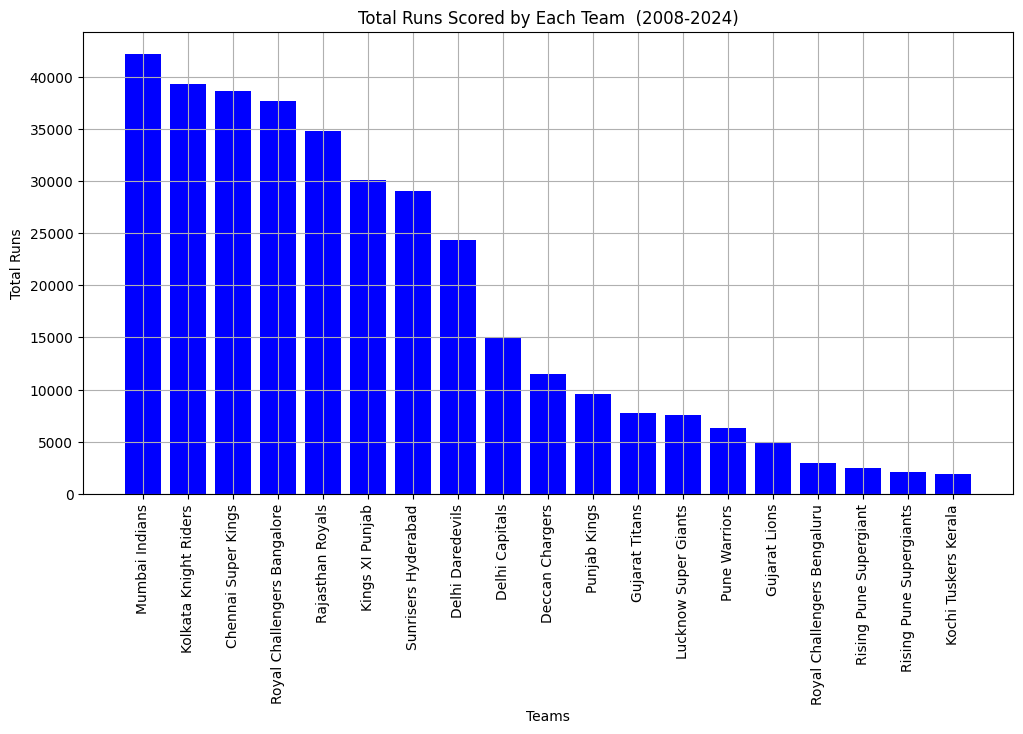

In [74]:
import matplotlib.pyplot as plt

# Calculate total runs scored by each team
total_runs_by_team = delivery.groupby('batting_team')['total_runs'].sum()

# Sort the total runs by team in descending order
total_runs_by_team_sorted = total_runs_by_team.sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(total_runs_by_team_sorted.index, total_runs_by_team_sorted, color='blue')
plt.title('Total Runs Scored by Each Team  (2008-2024)')
plt.xlabel('Teams')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


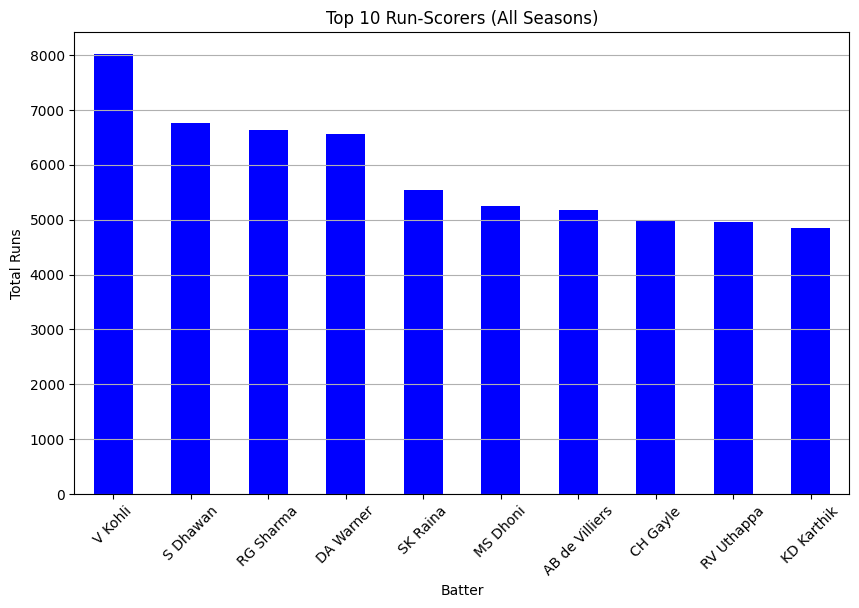

In [75]:
top_scorers = delivery.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

top_scorers.plot(kind='bar', color='blue', figsize=(10, 6), title='Top 10 Run-Scorers (All Seasons)')
plt.xlabel('Batter')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


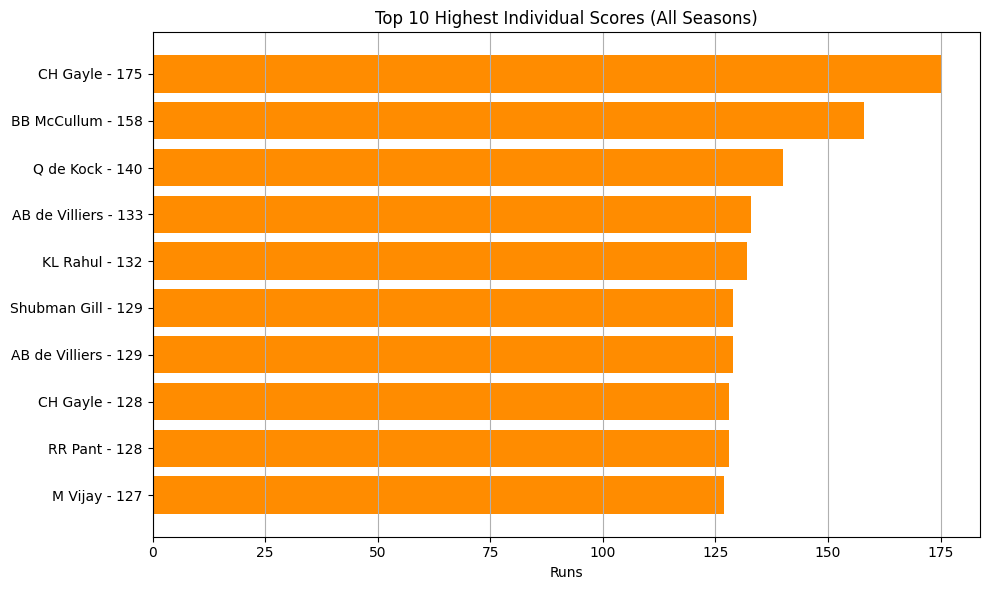

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by match and batter to get individual scores
individual_scores = delivery.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()

# top 10 scores
top_scores = individual_scores.sort_values('batsman_runs', ascending=False).head(10)

top_scores = top_scores.merge(match[['id', 'season']], left_on='match_id', right_on='id')


top_scores['label'] = top_scores['batter'] + ' - ' + top_scores['batsman_runs'].astype(str)

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.barh(top_scores['label'], top_scores['batsman_runs'], color='darkorange')
plt.xlabel('Runs')
plt.title('Top 10 Highest Individual Scores (All Seasons)')
plt.gca().invert_yaxis()  
plt.grid(axis='x')
plt.tight_layout()
plt.show()


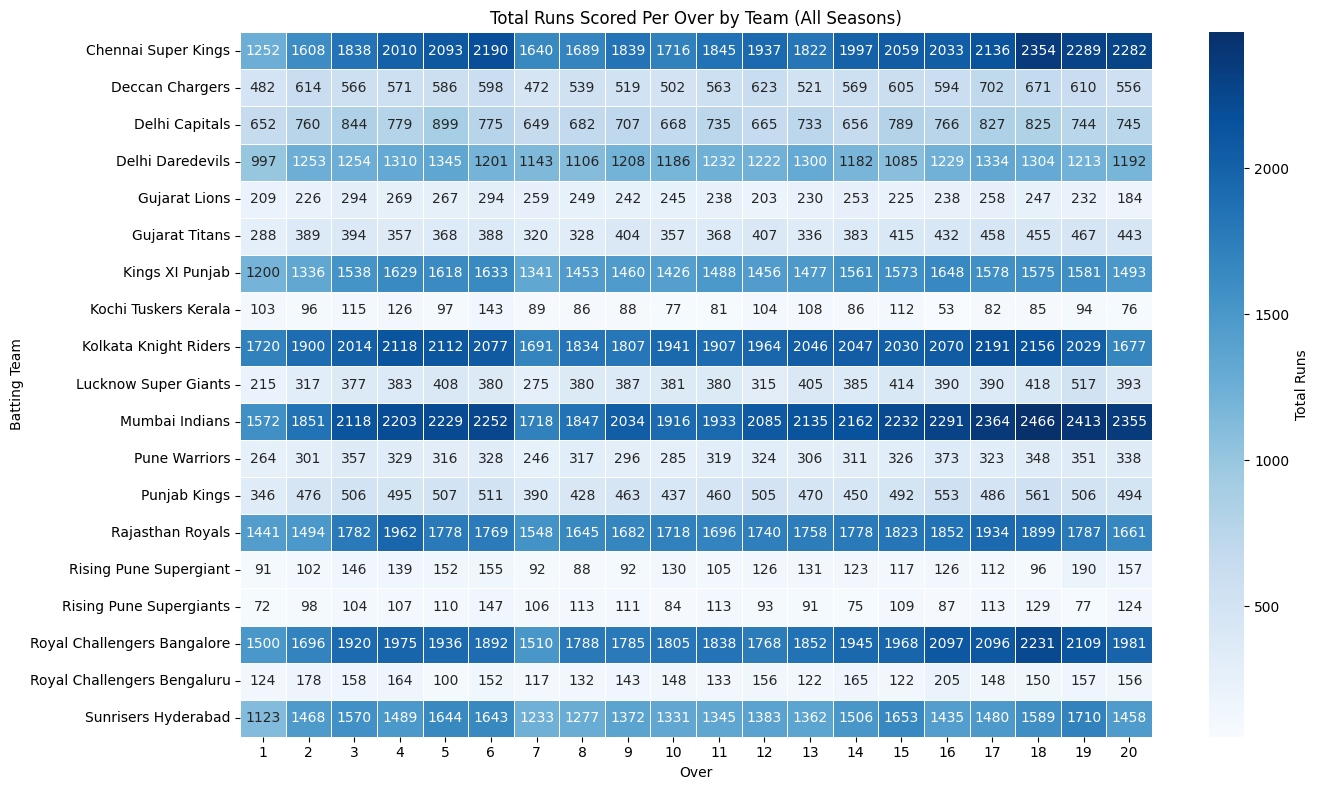

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


delivery_copy = delivery.copy()
delivery_copy['over'] = delivery_copy['over'] + 1

# Group by team and over, sum total runs
run_totals = delivery_copy.groupby(['batting_team', 'over'])['total_runs'].sum().reset_index()

# Pivot to get teams as rows, overs as columns
heatmap_data = run_totals.pivot(index='batting_team', columns='over', values='total_runs').fillna(0)


plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Total Runs'})
plt.title('Total Runs Scored Per Over by Team (All Seasons)')
plt.xlabel('Over')
plt.ylabel('Batting Team')
plt.tight_layout()
plt.show()


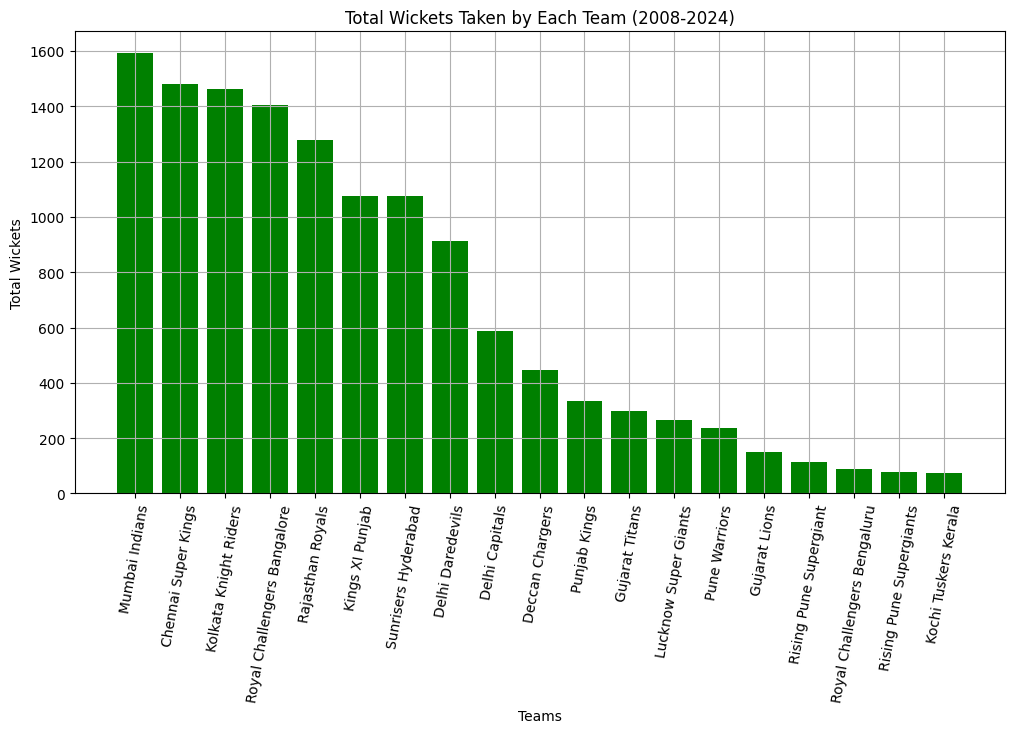

In [80]:
import matplotlib.pyplot as plt

# Calculate total wickets taken by each team
total_wickets_by_team = delivery[delivery['player_dismissed'].notnull()].groupby('bowling_team')['player_dismissed'].count()

# Sort the total wickets by team in descending order
total_wickets_by_team_sorted = total_wickets_by_team.sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(total_wickets_by_team_sorted.index, total_wickets_by_team_sorted, color='green')
plt.title('Total Wickets Taken by Each Team (2008-2024)')
plt.xlabel('Teams')
plt.ylabel('Total Wickets')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()


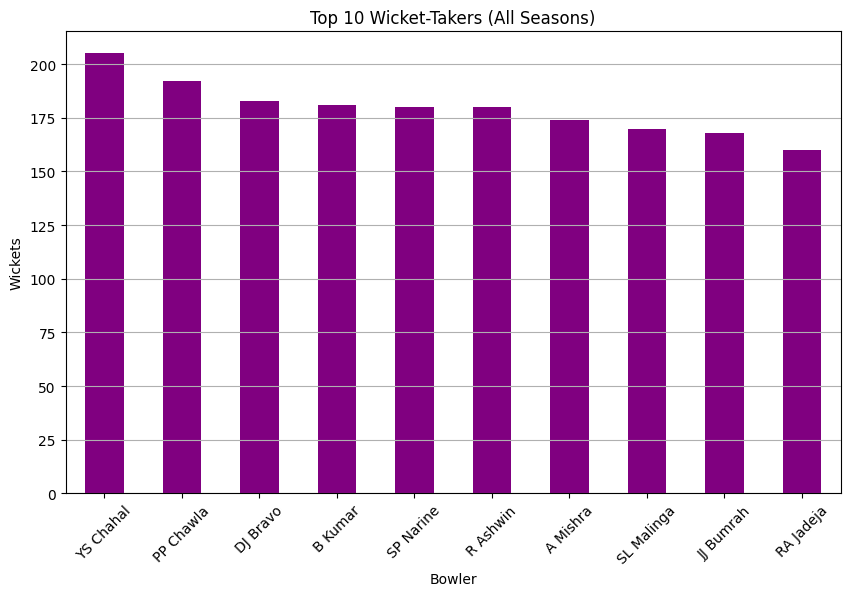

In [93]:
# Filter proper bowling dismissals
dismissals = delivery[delivery['is_wicket'] == 1]
# Remove run outs
dismissals = dismissals[~dismissals['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field'])]
top_bowlers = dismissals['bowler'].value_counts().head(10)

top_bowlers.plot(kind='bar', color='purple', figsize=(10, 6), title='Top 10 Wicket-Takers (All Seasons)')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


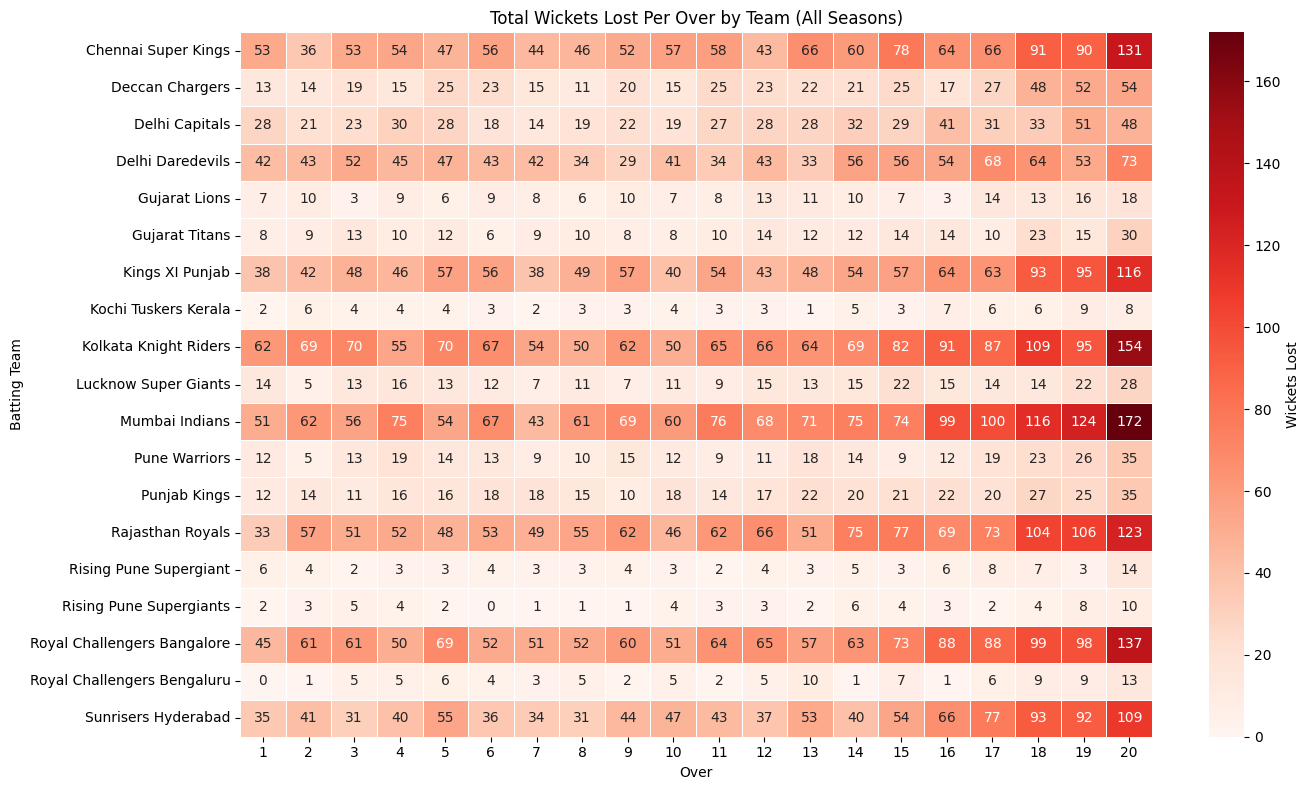

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter only the deliveries where a wicket fell
wickets = delivery[delivery['is_wicket'] == 1].copy()

# Fix the over column (0-indexed to 1-indexed)
wickets['over'] = wickets['over'] + 1  # Now overs range from 1 to 20

# Group by team and over to count total wickets
wicket_counts = wickets.groupby(['batting_team', 'over'])['is_wicket'].count().reset_index()

#Pivot to create heatmap format (teams as rows, overs as columns)
heatmap_data = wicket_counts.pivot(index='batting_team', columns='over', values='is_wicket').fillna(0)


plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Wickets Lost'})
plt.title('Total Wickets Lost Per Over by Team (All Seasons)')
plt.xlabel('Over')
plt.ylabel('Batting Team')
plt.tight_layout()
plt.show()


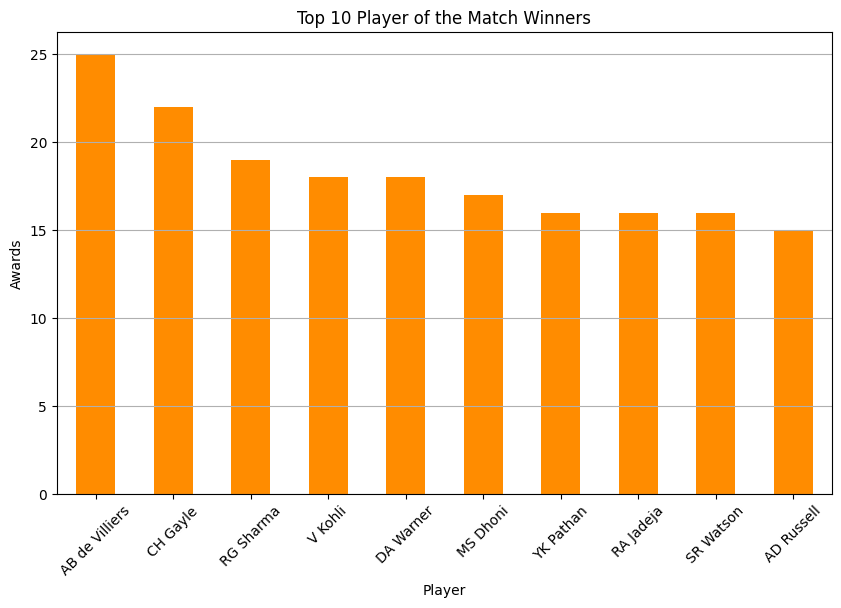

In [87]:
top_players = match['player_of_match'].value_counts().head(10)

top_players.plot(kind='bar', color='darkorange', figsize=(10, 6), title='Top 10 Player of the Match Winners')
plt.xlabel('Player')
plt.ylabel('Awards')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Drop NaNs from dismissal_kind column
dismissals = delivery['dismissal_kind'].dropna()

# Create a DataFrame for plotting
dismissal_types = dismissals.value_counts().reset_index()
dismissal_types.columns = ['Dismissal Type', 'Count']

# Create pie chart
fig = px.pie(
    dismissal_types,
    names='Dismissal Type',
    values='Count',
    title='Dismissal Type Distribution',
    hole=0.3  
)

fig.show()


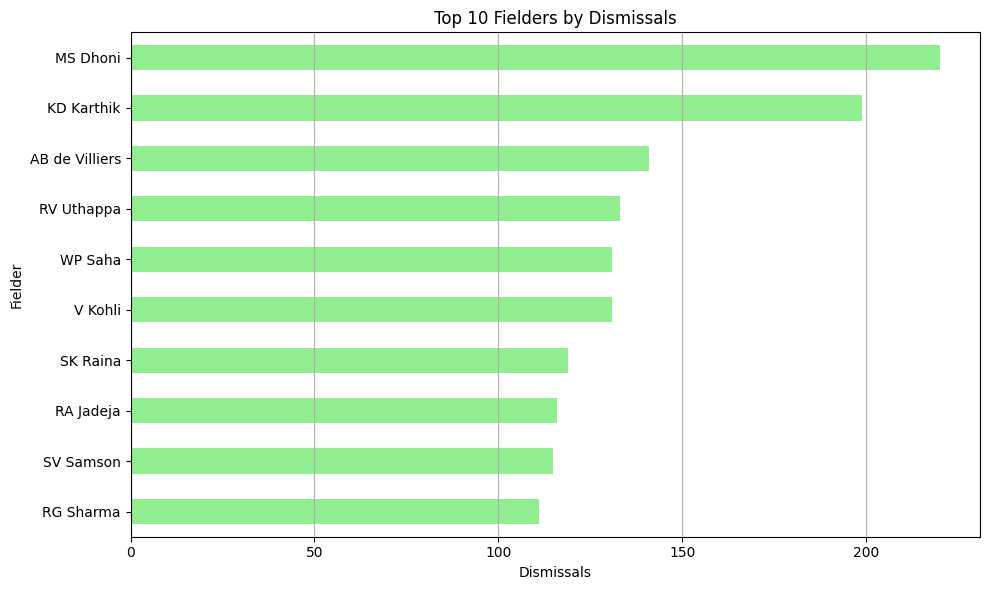

In [123]:
import matplotlib.pyplot as plt

# Exclude NaNs in fielder column
fielders = delivery[delivery['fielder'].notna()]

# Get top 10 fielders by number of dismissals
top_fielders = fielders['fielder'].value_counts().head(10)


top_fielders = top_fielders.sort_values(ascending=True)

top_fielders.plot(
    kind='barh',
    color='lightgreen',
    figsize=(10, 6),
    title='Top 10 Fielders by Dismissals'
)

plt.xlabel('Dismissals')
plt.ylabel('Fielder')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


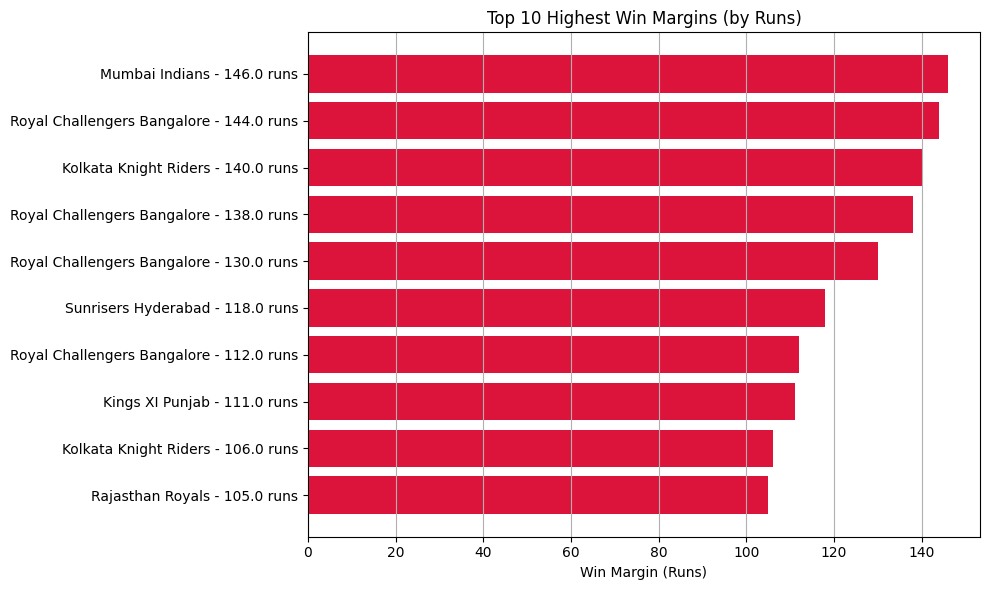

In [ ]:
import matplotlib.pyplot as plt

# Filter for matches won by runs
run_wins = match[match['result'] == 'runs']

# top 10 highest win margins
top_run_wins = run_wins.sort_values('result_margin', ascending=False).head(10)


top_run_wins['label'] = top_run_wins['winner'] + ' - ' + top_run_wins['result_margin'].astype(str) + ' runs'

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_run_wins['label'], top_run_wins['result_margin'], color='crimson')
plt.xlabel('Win Margin (Runs)')
plt.title('Top 10 Highest Win Margins (by Runs)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


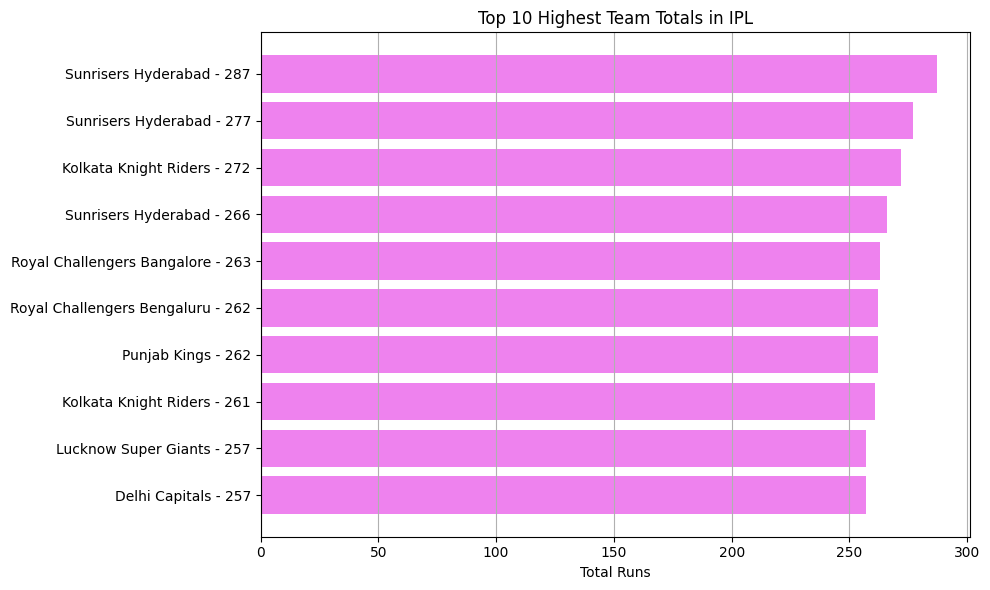

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate total runs by match, inning, and team
team_totals = delivery.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# top 10 highest totals
top_totals = team_totals.sort_values('total_runs', ascending=False).head(10)


top_totals['label'] = top_totals['batting_team'] + ' - ' + top_totals['total_runs'].astype(str)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_totals['label'], top_totals['total_runs'], color='violet')
plt.xlabel('Total Runs')
plt.title('Top 10 Highest Team Totals in IPL')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


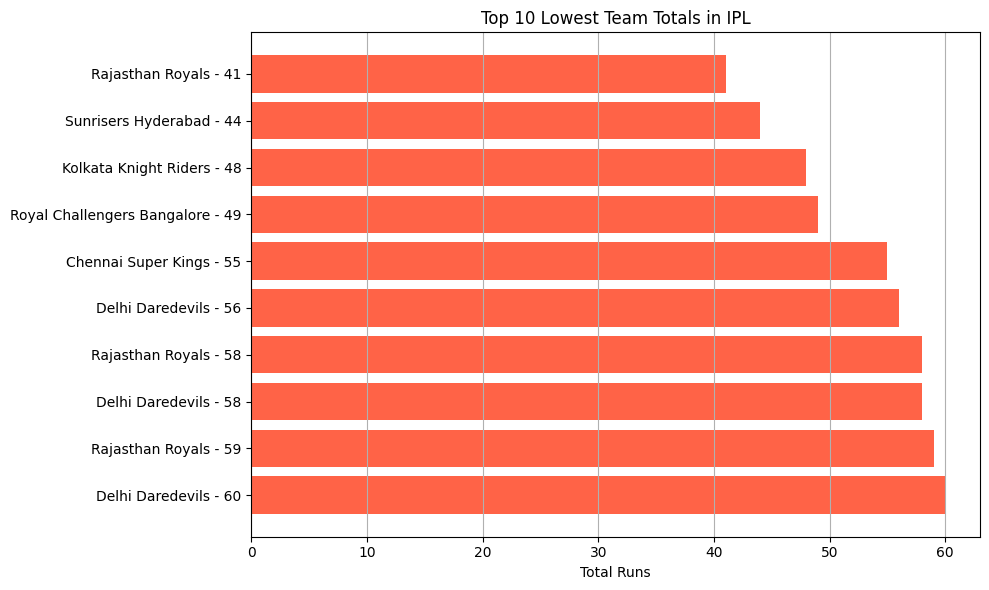

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate total runs by match, inning, and team
team_totals = delivery.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# Filter out innings with super low runs that are likely incomplete (e.g., less than 20)
team_totals = team_totals[team_totals['total_runs'] >= 30]

# bottom 10 lowest totals
low_totals = team_totals.sort_values('total_runs').head(10)


low_totals['label'] = low_totals['batting_team'] + ' - ' + low_totals['total_runs'].astype(str)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(low_totals['label'], low_totals['total_runs'], color='tomato')
plt.xlabel('Total Runs')
plt.title('Top 10 Lowest Team Totals in IPL')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Merge delivery with match to get season info
delivery_season = delivery.merge(match[['id', 'season']], left_on='match_id', right_on='id')

# Group by season and batter
batter_season_stats = delivery_season.groupby(['season', 'batter']).agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()

# Compute strike rate
batter_season_stats['strike_rate'] = (batter_season_stats['batsman_runs'] / batter_season_stats['ball']) * 100

# Filter: Min 100 balls faced
filtered = batter_season_stats[batter_season_stats['ball'] >= 100]

# For each season, get the batter with highest strike rate
top_strikers = filtered.loc[filtered.groupby('season')['strike_rate'].idxmax()]

# Sort by season
top_strikers = top_strikers.sort_values('season')


fig = px.line(
    top_strikers,
    x='season',
    y='strike_rate',
    markers=True,
    text='batter',
    title='Highest Strike Rate Each Season (Min 100 Balls Faced)',
    labels={'season': 'Season', 'strike_rate': 'Strike Rate'}
)


fig.update_traces(
    textposition='top center',
    marker=dict(size=8, color='indigo'),
    line=dict(color='purple', width=2)
)

fig.update_layout(
    template='plotly_white',
    xaxis=dict(tickmode='linear', tickangle=0),
    yaxis=dict(range=[top_strikers['strike_rate'].min() - 5, top_strikers['strike_rate'].max() + 10])
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Merge delivery with match to get season info
delivery_season = delivery.merge(match[['id', 'season']], left_on='match_id', right_on='id')

# Filter only valid dismissals (exclude run outs, etc.)
valid_kinds = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
valid_wickets = delivery_season[delivery_season['dismissal_kind'].isin(valid_kinds)]

# Group by match, bowler, and season to calculate wickets and runs
bowling_figures = delivery_season.groupby(['season', 'match_id', 'bowler', 'bowling_team']).agg(
    runs_conceded=('total_runs', 'sum'),
    wickets=('player_dismissed', lambda x: x.notna().sum())
).reset_index()

# Get best bowling per season (most wickets, then least runs)
best_figures = bowling_figures.sort_values(['season', 'wickets', 'runs_conceded'], ascending=[True, False, True])
best_per_season = best_figures.groupby('season').first().reset_index()

# Label: e.g. 5/12 - Bumrah (MI)
best_per_season['label'] = (
    best_per_season['wickets'].astype(str) + '/' +
    best_per_season['runs_conceded'].astype(str) + ' - ' +
    best_per_season['bowler'] + ' (' +
    best_per_season['bowling_team'] + ')'
)

# Plot
fig = px.bar(
    best_per_season,
    x='season',
    y='wickets',
    color='runs_conceded',
    hover_name='label',
    title='Best Bowling Figures Per Season (with Team)',
    labels={'wickets': 'Wickets Taken', 'runs_conceded': 'Runs Conceded'},
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(line=dict(color='black', width=0.8)))
fig.update_layout(template='plotly_white', xaxis=dict(type='category'))

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Merge delivery with match to get season info
delivery_season = delivery.merge(match[['id', 'season']], left_on='match_id', right_on='id')

# Group by season, match, and batter to get individual innings
batting_figures = delivery_season.groupby(['season', 'match_id', 'batter']).agg(
    runs=('batsman_runs', 'sum')
).reset_index()

# Get highest score per season
best_scores = batting_figures.sort_values(['season', 'runs'], ascending=[True, False])
top_scores_per_season = best_scores.groupby('season').first().reset_index()

# Create a label e.g 133 - de Villiers
top_scores_per_season['label'] = top_scores_per_season['runs'].astype(str) + ' - ' + top_scores_per_season['batter']


fig = px.bar(
    top_scores_per_season,
    x='season',
    y='runs',
    color='runs',
    hover_name='label',
    title='Highest Individual Score Per Season',
    labels={'runs': 'Runs Scored'},
    color_continuous_scale='redor'
)

fig.update_traces(marker=dict(line=dict(color='black', width=0.8)))
fig.update_layout(template='plotly_white', xaxis=dict(type='category'))

fig.show()
